In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [4]:
#----------------------------------------------------------------------------
df = pd.read_csv("/content/RELIANCE_5yrs.csv")
#----------------------------------------------------------------------------



# Get close price data
data = df.filter(['Close']).values

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
training_data_len = int(len(data) * 0.8)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=100)

# Create testing data set
test_data = scaled_data[training_data_len - 10:, :]
x_test = []
y_test = data[training_data_len:, :]

for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



# Predict the future trend
future_data = df.filter(['Close'])
last_60_days = future_data[-10:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
future_prediction = model.predict(X_test)
future_prediction = scaler.inverse_transform(future_prediction)
print('Predicted price for the next day:', future_prediction[0][0])

Epoch 1/100
31/31 [==============================] - 5s 21ms/step - loss: 0.0259 - accuracy: 0.0021
Epoch 2/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0017 - accuracy: 0.0021
Epoch 3/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 4/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 5/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 6/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 7/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 8/100
31/31 [==============================] - 1s 21ms/step - loss: 0.0011 - accuracy: 0.0021
Epoch 9/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0012 - accuracy: 0.0021
Epoch 10/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0011 - accuracy: 0.0021

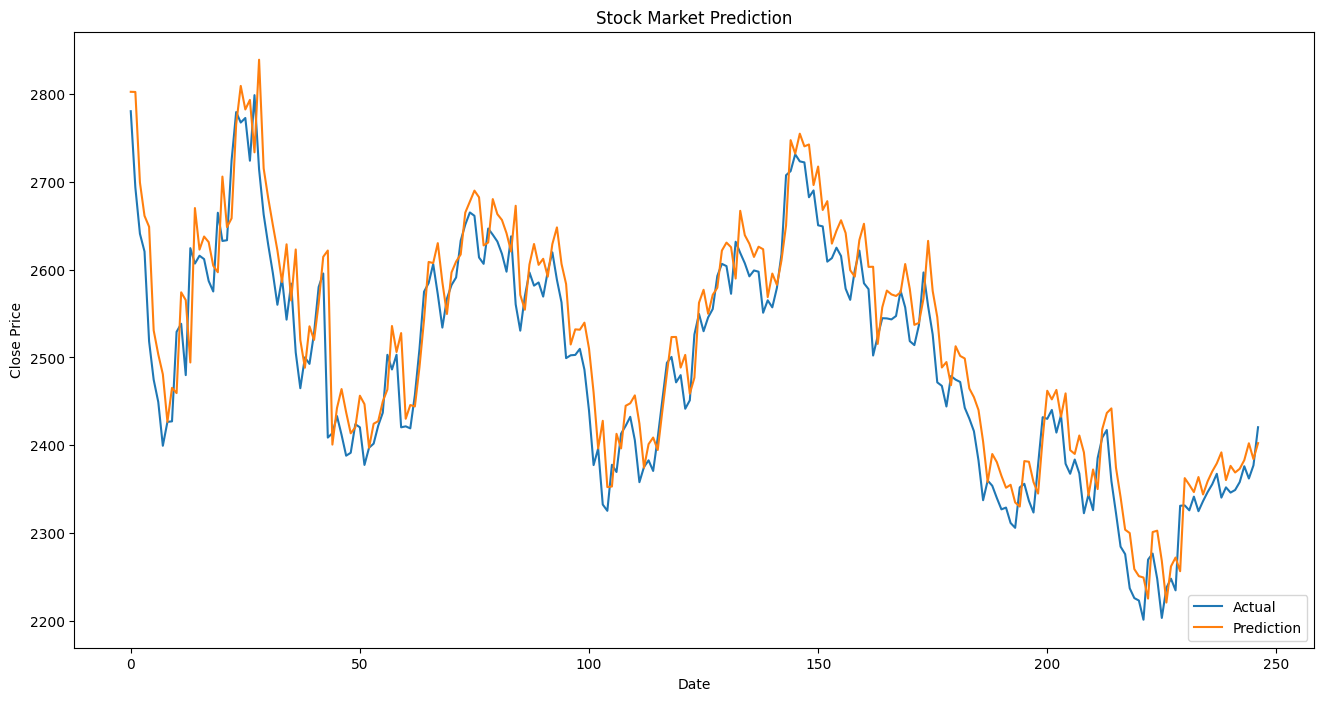

In [5]:
# Plot the predictions and actual values
plt.figure(figsize=(16,8))
plt.title('Stock Market Prediction')
plt.plot(y_test)
plt.plot(predictions)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Actual', 'Prediction'], loc='lower right')
plt.show()

In [6]:
# make predictions for the next 10 days
future_data = df.filter(['Close'])
last_60_days = future_data[-60:]
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_prices = []
for i in range(10):
    predicted_price = model.predict(X_test)
    predicted_prices.append(predicted_price[0][0])
    X_test = np.append(X_test, [predicted_price], axis=1)

# invert the scaling
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_prices)

# print the predicted prices
print(predicted_prices)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step
[[2475.966 ]
 [2532.9302]
 [2588.9998]
 [2643.3765]
 [2695.9182]
 [2746.848 ]
 [2796.5156]
 [2845.2698]
 [2893.3909]
 [2941.0754]]
